# Liner Regression Lab

### Data
Recently, the annual number of driver deaths per 100,000 for the selected age groups was as follows:

| Age |	Number of Driver Deaths per 100,000 
|-----|-----
| 17.5 |	38 
|22|	36 
|29.5|	24
|44.5|	20
|64.5|	18
|80	| 28


### Setup

In [1]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



# Load Data

age = [17.5, 22, 29.5, 44.5, 64.5, 80]
# Number of Driver Deaths per 100,000
num_of_driver_deaths = [38, 36, 24, 20, 18, 28]

### Questions

#### For each age group, pick the midpoint of the interval for the x value. (For the 75+ group, use 80.). Using “ages” as the independent variable and “Number of driver deaths per 100,000” as the dependent variable, make a scatter plot of the data.

#### Calculate the least squares (best–fit) line. Put the equation in the form of: ŷ = a + bx

In [2]:
import numpy as np

X = age
y = num_of_driver_deaths

Saving figure generated_data_plot


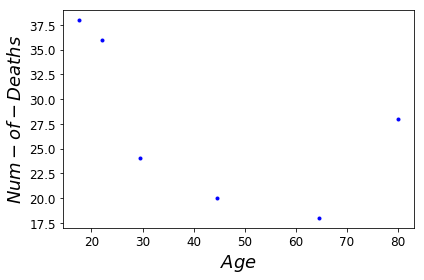

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$Num-of-Deaths$", rotation=90, fontsize=18)
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((6, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([35.58180453, -0.19182491])

In [6]:
X_new = np.array([[0], [100]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([35.58180453, 16.39931338])

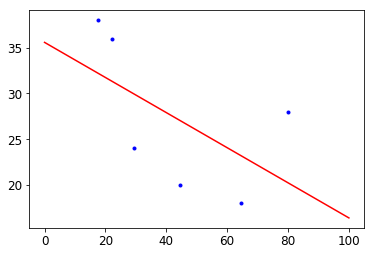

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

Saving figure linear_model_predictions_fit_line


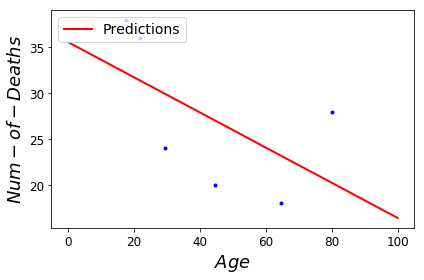

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$Num-of-Deaths$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
save_fig("linear_model_predictions_fit_line")
plt.show()

#### Predict the number of deaths for age 40

In [9]:

X_new = np.array([[1,40]])

# predict using formula
y_predict = X_new.dot(theta_best)
formula_prodiction = y_predict

# predict using LinearRegression library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

X_new_b = np.c_[np.ones((6, 1)), X]  # add x0 = 1 to each instance
lin_reg.fit(X_new_b, y)

lin_reg.intercept_, lin_reg.coef_

ln_reg_prdiction = lin_reg.predict(X_new)

print(formula_prodiction)
print(ln_reg_prdiction)

[27.90880807]
[27.90880807]


#### Predict the number of deaths for age 60.

In [10]:
X_new = np.array([[1, 60]])

# predict using formula
y_predict = X_new.dot(theta_best)
formula_prodiction = y_predict

# predict using LinearRegression library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

X_new_b = np.c_[np.ones((6, 1)), X]  # add x0 = 1 to each instance
lin_reg.fit(X_new_b, y)

lin_reg.intercept_, lin_reg.coef_

ln_reg_prdiction = lin_reg.predict(X_new)

print(formula_prodiction)
print(ln_reg_prdiction)


[24.07230984]
[24.07230984]


#### Based on the given data, is there a linear relationship between age of a driver and driver fatality rate?
##### Yes, negative correlation

#### Find the correlation coefficient (Pearson's r). Is it significant?

In [11]:
# Pearson's correlation coefficient
from scipy.stats.stats import pearsonr
pearsonr(X, y)


(-0.578743707566063, 0.22880788559284734)

##### Yes, this is a significant correlation